In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import pickle

In [ ]:
fp='/content/drive/MyDrive/INTERNSHIP/Madhu/Random_Forest/CollegePlacement.csv'
df=pd.read_csv(fp)

In [ ]:
df.head()

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No


In [ ]:
df.isnull().sum()

,0
College_ID,0
IQ,0
Prev_Sem_Result,0
CGPA,0
Academic_Performance,0
Internship_Experience,0
Extra_Curricular_Score,0
Communication_Skills,0
Projects_Completed,0
Placement,0


In [ ]:
le_intern=LabelEncoder()
df["Internship_Experience"]=le_intern.fit_transform(df["Internship_Experience"])

In [ ]:
le_place=LabelEncoder()
df["Placement"]=le_place.fit_transform(df["Placement"])

In [ ]:
x=df[["IQ","Prev_Sem_Result","CGPA","Academic_Performance","Internship_Experience","Extra_Curricular_Score","Communication_Skills","Projects_Completed"]]
y=df["Placement"]
print(x.shape)
print(y.shape)

(10000, 8)
(10000,)


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
model=RandomForestClassifier(n_estimators=5,max_depth=3,random_state=42)
model.fit(x_train,y_train)

RandomForestClassifier(max_depth=3, n_estimators=5, random_state=42)

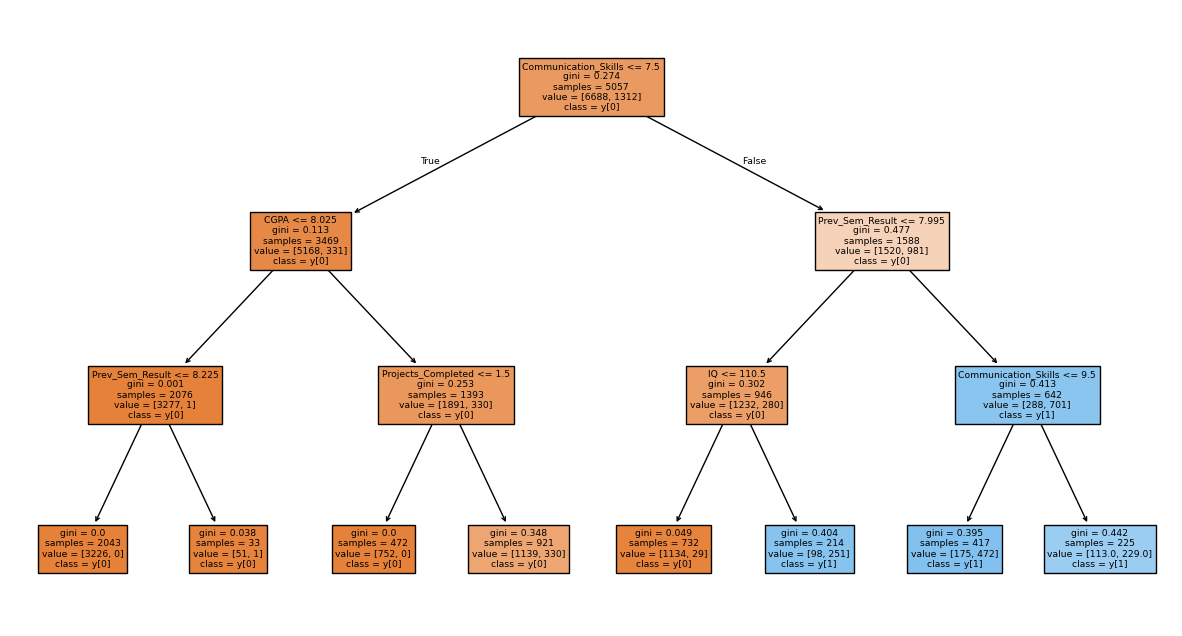

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 8))
plot_tree(
    model.estimators_[0],
    feature_names=x_train.columns,
    class_names=True,
    filled=True
)
plt.show()

In [ ]:
with open('placement_model.pkl','wb') as f:
  pickle.dump({'model':model,'le_intern':le_intern,'le_place':le_place,'features':x.columns.tolist()},f)